#Subway Data
Analyzing Subway and Weather Data

Questions:
    - What variables are related to subway ridership?
        - Which stations have the most riders?
        - What are the ridership patterns over time?
        - How does the weather affect ridership?
    - What patterns can I find in the weather?
        - Is the temperature rising throughout the month?
        - How does weather vary across the city?
        
#Two-Dimensional Data
**Python: List of Lists**, **Numpy: 2D Arrays**, **Pandas: DataFrame**

2D Arrays, as opposed to array of array:
    - More memory efficient
    - Accessing elements is a bit different: a[1,3]
    - mean(), std(), etc. operates on entire array

In [1]:
import numpy as np

ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [2]:
print(ridership[1, 3])
print(ridership[1:3, 3:5])
print(ridership[1, :])

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [3]:
print(ridership[0, :] + ridership[1, :])
print(ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [4]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(a + b)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


Writing a function to:
    1. find the max riders on the first day
    2. find the mean riders per day

In [5]:
def mean_riders_for_max_station(ridership):
   
    max_station = ridership[0,:].argmax()
    overall_mean = ridership.mean()
    mean_for_max = ridership[:,max_station].mean()
    
    return (overall_mean, mean_for_max)

In [6]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

#Numpy Axis
Operations along an Axis

In [7]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))

45
[12 15 18]
[ 6 15 24]


Finding the mean ridership per day each subway station. Returning the maximum and minimum ridership per day

In [8]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [9]:
def min_and_max_riders_per_day(ridership):

    mean_daily_ridership = ridership.mean(axis=0)
    max_daily_ridership = mean_daily_ridership.max()
    min_daily_ridership = mean_daily_ridership.min()
    
    return (max_daily_ridership, min_daily_ridership)

In [10]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

#Numpy and Pandas Data Type

In [11]:
np.array([1,2,3,4,5]).dtype

dtype('int32')

In [12]:
enrollments = np.array([
        ['account_key','status','join_date','days_to_cancel','is_udacity'],
        [448,'canceled','2014-11-10',65,True],
        [448,'canceled','2014-11-05',5,True],
        [448,'canceled','2015-01-27',0,True],
        [448,'canceled','2014-11-10',0,True],
        [448,'current','2015-03-10',np.nan,True]
    ])

In [13]:
enrollments

array([['account_key', 'status', 'join_date', 'days_to_cancel',
        'is_udacity'],
       ['448', 'canceled', '2014-11-10', '65', 'True'],
       ['448', 'canceled', '2014-11-05', '5', 'True'],
       ['448', 'canceled', '2015-01-27', '0', 'True'],
       ['448', 'canceled', '2014-11-10', '0', 'True'],
       ['448', 'current', '2015-03-10', 'nan', 'True']], 
      dtype='<U14')

This has converted everything to string. This could create problem while calculating mean and other metrices. Thus, Pandas Dataframe is used.

In [14]:
import pandas as pd

enrollments_df = pd.DataFrame({
        'account_key': [448,448,448,448,448],
        'status': ['canceled','canceled','canceled','canceled','current'],
        'join_date': ['2014-11-10','2014-11-05','2015-01-27','2014-11-10','2015-03-10'],
        'days_to_cancel': [65,5,0,0,np.nan],
        'is_udacity': [True,True,True,True,True]
    })

In [15]:
enrollments_df

,account_key,days_to_cancel,is_udacity,join_date,status
0,448,65,True,2014-11-10,canceled
1,448,5,True,2014-11-05,canceled
2,448,0,True,2015-01-27,canceled
3,448,0,True,2014-11-10,canceled
4,448,NaN,True,2015-03-10,current


In [16]:
enrollments_df.mean()

account_key       448.0
days_to_cancel     17.5
is_udacity          1.0
dtype: float64

#Accessing Elements of DataFrame

In [17]:
ridership_df = pd.DataFrame({
        'R003': [0,1478,1613,1560,1608,1576,95,2,1438,1342],
        'R004': [0,3877,4088,3392,4802,3933,229,0,3785,4043],
        'R005': [2,3674,3991,3826,3932,3909,255,1,3589,4009],
        'R006': [5,2328,6461,4787,4477,4979,496,27,4174,4665],
        'R007': [0,2539,2691,2613,2705,2685,201,0,2215,3033]
    },index=[
        '05-01-11','05-02-11','05-03-11','05-04-11','05-05-11',
        '05-06-11','05-07-11','05-08-11','05-09-11','05-10-11'
    ])

In [18]:
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [19]:
ridership_df.loc['05-02-11']

R003    1478
R004    3877
R005    3674
R006    2328
R007    2539
Name: 05-02-11, dtype: int64

In [20]:
ridership_df.iloc[9]

R003    1342
R004    4043
R005    4009
R006    4665
R007    3033
Name: 05-10-11, dtype: int64

In [21]:
ridership_df.iloc[1,3]

2328

In [22]:
ridership_df.loc['05-02-11','R003']

1478

In [23]:
ridership_df['R005']

05-01-11       2
05-02-11    3674
05-03-11    3991
05-04-11    3826
05-05-11    3932
05-06-11    3909
05-07-11     255
05-08-11       1
05-09-11    3589
05-10-11    4009
Name: R005, dtype: int64

In [24]:
ridership_df.values

array([[   0,    0,    2,    5,    0],
       [1478, 3877, 3674, 2328, 2539],
       [1613, 4088, 3991, 6461, 2691],
       [1560, 3392, 3826, 4787, 2613],
       [1608, 4802, 3932, 4477, 2705],
       [1576, 3933, 3909, 4979, 2685],
       [  95,  229,  255,  496,  201],
       [   2,    0,    1,   27,    0],
       [1438, 3785, 3589, 4174, 2215],
       [1342, 4043, 4009, 4665, 3033]], dtype=int64)

In [25]:
ridership_df.values.mean()

2342.5999999999999

In [26]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [27]:
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df_1)

df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print(df_2)
   
print(ridership_df.iloc[0])
print(ridership_df.loc['05-05-11'])
print(ridership_df['R003'])
print(ridership_df.iloc[1, 3])

   A  B
0  0  3
1  1  4
2  2  5
   A  B  C
0  0  1  2
1  3  4  5
R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [28]:
print(ridership_df.iloc[1:4])

print(ridership_df[['R003', 'R005']])

df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df.sum())
print(df.sum(axis=1))
print(df.values.sum())

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613
          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009
A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [29]:
def mean_riders_for_max_station(ridership):
    max_station = ridership.iloc[0].argmax()
    overall_mean = ridership.values.mean()
    mean_for_max = ridership[max_station].mean()
    
    return (overall_mean, mean_for_max)

In [30]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

#Loading Data into a DataFrame
DataFrame are a great data structure to represent CSVs:

In [31]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [32]:
subway_df.head() #print first 5 rows

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [33]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


#Calculating Correlation (Pearson's r)
x1 -> y1 (both above mean? both below mean? one above and one below mean?)

Pearson's r:
    - First Standardize each variable
    - Multiply each pair of values, and take the average
r = average of (x in std units) * (y in std units)

In [34]:
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof = 0)
    std_y = (y - y.mean()) / y.std(ddof = 0)
    return (std_x * std_y).mean()

In [35]:
entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))
print(correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


#Pandas Axis Names
Instead of axis = 0 or axis = 1, use axis = 'index' or axis = 'column'
#DataFrame Vectorized Operations
Similar to vectorized operations for 2D Numpy arrays

In [36]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print(df1 + df2)

    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99


In [37]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print(df1 + df2)

    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN


In [38]:
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                   index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                   index=['row4', 'row3', 'row2'])
print(df1 + df2)

       a   b   c
row1 NaN NaN NaN
row2  32  65  98
row3  23  56  89
row4 NaN NaN NaN


Converting a dataframe from total to hourly entries and exits

In [39]:
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [40]:
def get_hourly_entries_and_exits(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [41]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23,8
2,18,18
3,71,54
4,170,44
5,214,42
6,87,11
7,10,3
8,36,89
9,153,333


#Non-built-in Function for DataFrame
DataFrame applymap()

In [42]:
df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
def add_one(x):
    return x + 1

print(df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


Converting numerical grades to letter grades:
    - 90-100: A
    - 80-89: B
    - 70-79: C
    - 60-69: D
    - 0-59: F

In [43]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [44]:
def convert_grades(grades):
    grade_letter = None
    if grades >= 90 and grades <= 100:
        grade_letter = 'A'
    elif grades >= 80 and grades <= 89:
        grade_letter = 'A'
    elif grades >= 70 and grades <= 79:
        grade_letter = 'A'
    elif grades >= 60 and grades <= 69:
        grade_letter = 'A'
    else:
        grade_letter = 'F'
    return grade_letter

In [45]:
print(grades_df.applymap(convert_grades))

        exam1 exam2
Andre       F     F
Barry       A     A
Chris       A     F
Dan         A     F
Emilio      A     A
Fred        A     F
Greta       A     A
Humbert     A     F
Ivan        A     A
James       A     A


##DataFrame apply()
Works on a column or a row of dataframe

**Importance:** When you want to apply function on only one column or row

In [46]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [47]:
def convert_grades_curve(exam_grades):
    return pd.qcut(exam_grades,[0, 0.1, 0.2, 0.5, 0.8, 1],labels=['F', 'D', 'C', 'B', 'A'])

print(convert_grades_curve(grades_df['exam1']))
print(grades_df.apply(convert_grades_curve))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [48]:
def standardize(df):
    std_df = (df - df.mean()) / df.std(ddof = 0)
    return std_df

In [49]:
print(standardize(grades_df['exam1']))
print(grades_df.apply(standardize))

Andre     -2.315341
Barry      0.220191
Chris      0.020017
Dan       -0.180156
Emilio     0.753987
Fred      -0.513779
Greta      0.887436
Humbert   -0.847401
Ivan       1.354508
James      0.620538
Name: exam1, dtype: float64
            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


**Use Case 2:** When function would resturn a single value for single column or row. In this case, a series will be the output for a dataframe

In [50]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

In [51]:
print(df.apply(np.mean))
print(df.apply(np.max))

a     3
b    30
c    15
dtype: float64
a     5
b    50
c    25
dtype: int64


In [52]:
def second_largest(column):
    column_sort = column.sort(ascending = False,inplace = False)
    return column_sort.iloc[1]

In [53]:
df.apply(second_largest)

a     4
b    40
c    20
dtype: int64

#Adding a DataFrame to a Series

In [54]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [55]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


In [56]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df)
print('') # Create a blank line between outputs
print(df + s)
print('')
print(df.add(s,axis='columns'))

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN


In [57]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

print(df)
print('') # Create a blank line between outputs
print(df.add(s,axis='index'))

    0
0  10
1  20
2  30
3  40

    0
0  11
1  22
2  33
3  44


In [58]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [59]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [60]:
s = pd.Series([1, 2, 3, 4], index=['b', 'c', 'd', 'e'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d   e
0 NaN  51   92  133 NaN
1 NaN  61  102  143 NaN
2 NaN  71  112  153 NaN
3 NaN  81  122  163 NaN


#Standardizing each Column Again

In [61]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [62]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df.add(s, axis='index'))

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164


In [63]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

print(df)
print('') # Create a blank line between outputs
print(df.add(s, axis='columns'))

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [64]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [65]:
(grades_df - grades_df.mean()) / grades_df.std() #Standardizing column wise

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


In [66]:
grades_diff = grades_df.sub(grades_df.mean(axis = 'columns'), axis = 'index')
grades_diff.div(grades_df.std(axis = 'columns'), axis = 'index') #Standardizing column wise

,exam1,exam2
Andre,0.707107,-0.707107
Barry,0.707107,-0.707107
Chris,0.707107,-0.707107
Dan,0.707107,-0.707107
Emilio,0.707107,-0.707107
Fred,0.707107,-0.707107
Greta,0.707107,-0.707107
Humbert,0.707107,-0.707107
Ivan,0.707107,-0.707107
James,0.707107,-0.707107


#Pandas groupby()
Calculating ridership effect by:
    - Hour of Day
    - Rain
    - Day of Week

In [67]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [68]:
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [69]:
grouped_data = example_df.groupby('even')
print(grouped_data.groups)

{False: ['a', 'b', 'e'], True: ['c', 'd', 'f', 'g']}


In [70]:
grouped_data = example_df.groupby(['even', 'above_three'])
print(grouped_data.groups)

{(True, False): ['c'], (False, False): ['a', 'b', 'e'], (True, True): ['d', 'f', 'g']}


In [71]:
grouped_data = example_df.groupby('even')
print(grouped_data.sum())

       above_three  value
even                     
False            0      5
True             3     16


In [72]:
grouped_data = example_df.groupby('even')
print(grouped_data.sum()['value'])
print('\n') # Blank line to separate results
print(grouped_data['value'].sum())

even
False     5
True     16
Name: value, dtype: int32


even
False     5
True     16
Name: value, dtype: int32


In [73]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


**Hour of Day**

In [74]:
ridership_by_hour = subway_df.groupby('hour').mean()['ENTRIESn_hourly']
ridership_by_hour

hour
0     1403.248441
4      311.717653
8      879.029929
12    3010.949693
16    2306.527816
20    3226.240093
Name: ENTRIESn_hourly, dtype: float64

**Rain**

In [75]:
ridership_by_rain = subway_df.groupby('rain').mean()['ENTRIESn_hourly']
ridership_by_rain

rain
0    1845.539439
1    2028.196035
Name: ENTRIESn_hourly, dtype: float64

**Day of Week**

In [76]:
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']
ridership_by_day

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

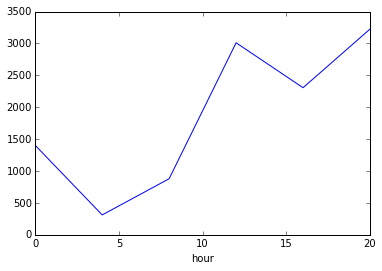

In [77]:
%matplotlib inline
ridership_by_hour.plot()

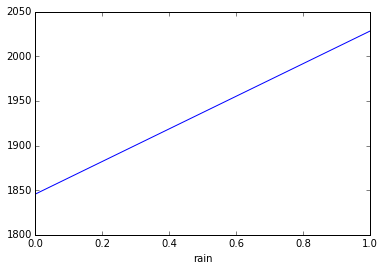

In [78]:
ridership_by_rain.plot()

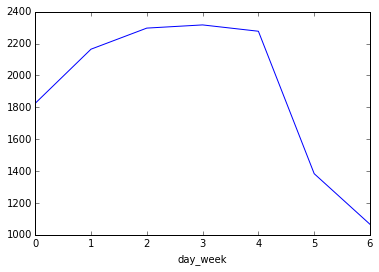

In [79]:
ridership_by_day.plot()

#Calculating Hourly Entries and Exits

In [80]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [81]:
def standardize(xs):
        return (xs - xs.mean()) / xs.std()
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(standardize))

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
dtype: float64


In [82]:
def second_largest(xs):
    sorted_xs = xs.sort(inplace=False, ascending=False)
    return sorted_xs.iloc[1]
grouped_data = example_df.groupby('even')
print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In [83]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

In [84]:
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [85]:
def hourly_for_group(entries_and_exits):
    return entries_and_exits - entries_and_exits.shift(1)

In [86]:
ridership_df.groupby('UNIT')[['ENTRIESn','EXITSn']].apply(hourly_for_group)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23,8
3,14,8
4,18,18
5,29,205
6,71,54
7,132,593
8,170,44


#Combining Pandas DataFrame
Working with Multiple DataFrames

In [87]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

In [88]:
weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [89]:
subway_df.head()

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564


In [90]:
weather_df.head()

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5


In [91]:
def combine_dfs(subway_df, weather_df):
    merged_df = subway_df.merge(weather_df,on = ['DATEn','hour','latitude','longitude'],how = 'inner')
    return merged_df

In [92]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


**Merging DataFrame with Different Names of Common Column**

In [93]:
weather_df = pd.DataFrame({
    'date': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [94]:
subway_df.merge(weather_df,left_on = ['DATEn','hour','latitude','longitude'],
                right_on = ['date','hour','latitude','longitude'],how = 'inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,date,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,05-01-11,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,05-02-11,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,05-03-11,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,05-04-11,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,05-05-11,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,05-01-11,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,05-02-11,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,05-03-11,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,05-04-11,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,05-05-11,0,30.01,0,48.9,15.0


#Plotting with DataFrames

In [95]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [96]:
subway_df.head(3)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177


In [97]:
data_by_location = subway_df.groupby(['latitude','longitude'],as_index=False).mean()
data_by_location.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9659049.284153,8641132.316940,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8306897.075676,6646822.740541,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,45529095.112903,46124075.795699,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7268213.576471,7961334.500000,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6477944.768293,5994957.432927,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


In [98]:
data_by_location.head()['longitude']

0   -73.975925
1   -73.968523
2   -73.961806
3   -73.974295
4   -73.797011
Name: longitude, dtype: float64

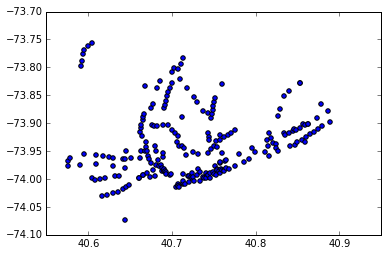

In [99]:
import matplotlib.pyplot as plt

plt.scatter(data_by_location['latitude'],data_by_location['longitude'])

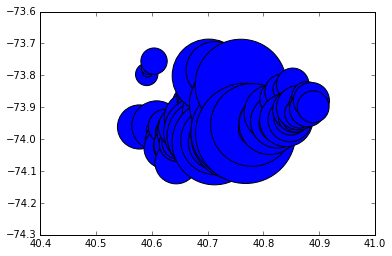

In [100]:
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],s = data_by_location['ENTRIESn_hourly'])

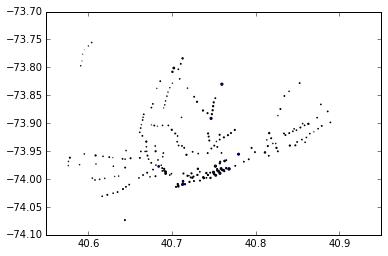

In [101]:
#to standardize the size of bubbles
scaled_entry =  (data_by_location['ENTRIESn_hourly']/data_by_location['ENTRIESn_hourly'].std())
plt.scatter(data_by_location['latitude'],data_by_location['longitude'],s = scaled_entry)

#Three-dimensional Data

In [102]:
a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])
print(a)

[[['A1a' 'A1b' 'A1c']
  ['A2a' 'A2b' 'A2c']]

 [['B1a' 'B1b' 'B1c']
  ['B2a' 'B2b' 'B2c']]]


In [103]:
wp = pd.Panel(np.random.randn(2, 5, 4), items=['Item1', 'Item2'],
              major_axis=pd.date_range('1/1/2000', periods=5),
              minor_axis=['A', 'B', 'C', 'D'])

In [104]:
wp

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 4 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 2000-01-01 00:00:00 to 2000-01-05 00:00:00
Minor_axis axis: A to D